In [81]:
# --------- import necessary modules -------
import re
# For webscraping
from bs4 import BeautifulSoup

# Parsing and creating xml data
from lxml import etree as et

# Store data as a csv file written out
from csv import writer

# In general to use with timing our function calls to Indeed
import time

# Assist with creating incremental timing for our scraping to seem more human
from time import sleep

# Dataframe stuff
import pandas as pd

# Random integer for more realistic timing for clicks, buttons and searches during scraping
from random import randint

# Multi Threading
import threading

from googletrans import Translator

# Threading:
from concurrent.futures import ThreadPoolExecutor, wait

from matplotlib import pyplot as plt

import seaborn as sns


In [6]:
import selenium

# Check version I am running
selenium.__version__

'4.21.0'

In [22]:
# Selenium 4:

from selenium import webdriver

# Starting/Stopping Driver: can specify ports or location but not remote access
from selenium.webdriver.chrome.service import Service as ChromeService

# Manages Binaries needed for WebDriver without installing anything directly
from webdriver_manager.chrome import ChromeDriverManager


from selenium.webdriver.chrome.options import Options


In [8]:

# Allows searchs similar to beautiful soup: find_all
from selenium.webdriver.common.by import By

# Try to establish wait times for the page to load
from selenium.webdriver.support.ui import WebDriverWait

# Wait for specific condition based on defined task: web elements, boolean are examples
from selenium.webdriver.support import expected_conditions as EC

# Used for keyboard movements, up/down, left/right,delete, etc
from selenium.webdriver.common.keys import Keys

# Locate elements on page and throw error if they do not exist
from selenium.common.exceptions import NoSuchElementException

In [9]:
# Allows you to cusotmize: ingonito mode, maximize window size, headless browser, disable certain features, etc
option= webdriver.ChromeOptions()

# Going undercover:
option.add_argument("--incognito")


# # Consider this if the application works and you know how it works for speed ups and rendering!

# option.add_argument('--headless=chrome')

In [14]:
# Define job and location search keywords
job_search_keyword = ['Data+Scientist', 'Business+Analyst', 'Data+Engineer', 
                      'Python+Developer', 'Full+Stack+Developer', 
                      'Machine+Learning+Engineer']

# Define Locations of Interest
location_search_keyword = ['New+York', 'California', 'Washington']

# Finding location, position, radius=35 miles, sort by date and starting page
paginaton_url = 'https://fi.indeed.com/jobs?q={}&l={}&radius=35&filter=0&sort=date&start={}'

# print(paginaton_url)

In [44]:
# Translation dictionary for Finnish to English
# Initialize the translator
translator = Translator()

def translate_date(finnish_date):
    if not finnish_date:  # Check if the text is None or empty
        return finnish_date
    try:
        translation = translator.translate(finnish_date, src='fi', dest='en')
        return translation.text
    except Exception as e:
        print(f"Translation failed: {e}")
        return finnish_date



In [42]:
start = time.time()


job_='Data+Scientist'
location='Helsinki'

driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()),
                         options=option)


driver.get(paginaton_url.format(job_,location,0))

# t = ScrapeThread(url_)
# t.start()

sleep(randint(2, 6))

p=driver.find_element(By.CLASS_NAME,'jobsearch-JobCountAndSortPane-jobCount').text

# Max number of pages for this search! There is a caveat described soon
max_iter_pgs=int(p.split(' ')[0])//15 


driver.quit() # Closing the browser we opened


end = time.time()

print(end - start,'seconds to complete action!')
print('-----------------------')
print('Max Iterable Pages for this search:',max_iter_pgs)

KeyboardInterrupt: 

In [82]:
# Pagination: PRACTICE
# Setup Chrome options
options = Options()
options.headless = True

start = time.time()


job_='Data+Scientist'
location='Helsinki'


max_iter_pgs = 5  # Number of pages to iterate

job_lst = []
salary_list = []

driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()), options=options)

def get_jobs_from_page(page_number):
    driver.get(f"https://fi.indeed.com/jobs?q={job_}&l={location}&start={page_number * 10}")
    WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.ID, "mosaic-jobResults"))
    )
    job_page = driver.find_element(By.ID, "mosaic-jobResults")
    jobs = job_page.find_elements(By.CLASS_NAME, "job_seen_beacon")
    
    for jj in jobs:
        job_title = jj.find_element(By.CLASS_NAME, "jobTitle")
        job_href = job_title.find_element(By.CSS_SELECTOR, "a").get_attribute("href")
        
        try:
            company_name = jj.find_element(By.CSS_SELECTOR, "span[data-testid='company-name']").text
        except NoSuchElementException:
            company_name = None

        try:
            company_location = jj.find_element(By.CSS_SELECTOR, "div[data-testid='text-location']").text
        except NoSuchElementException:
            company_location = None

        try:
            post_date_text = jj.find_element(By.CSS_SELECTOR, "span[data-testid='myJobsStateDate']").text
            post_date = translate_date(post_date_text)
        except NoSuchElementException:
            post_date = None

        job_lst.append([job_title.text, job_href, company_name, company_location, post_date])


for i in range(max_iter_pgs):
    get_jobs_from_page(i)
    sleep(randint(2, 4))

driver.quit()

end = time.time()

print(end - start, 'seconds to complete Query!')
print("Jobs extracted:", len(job_lst))
print("Sample job data:", job_lst[:5])

28.67247176170349 seconds to complete Query!
Jobs extracted: 65
Sample job data: [['Data Scientist, GenAI', 'https://fi.indeed.com/rc/clk?jk=5291449e3eeca8da&bb=qzZPZhUXNeo7kVxLaBUW8J2pUlEoCfj261SO7lfGUOH2fmfuy2Avp1xykotxhLvOyS-2_usX4mgXiWOvYNDRBRx6BeLuU1oL5f4LkEe0yHJOo0X_IMLpvTCH8rbHzXD9&xkcb=SoDi67M3_DVnxBwHN50LbzkdCdPP&fccid=ae78ed73127a3743&vjs=3', 'Futurice GmbH', 'Helsinki', 'Posted\nPublished more than 30 days ago'], ['Data Scientist', 'https://fi.indeed.com/rc/clk?jk=c648507f65cd2c76&bb=qzZPZhUXNeo7kVxLaBUW8C724mzQ9Kz4mJYhLVSS1hWEiaIFMJYD-J8ME3TwQgEhPV0C73v8vqXFoTBcYFN0hT8A9oigXaTH4H6EblkfDfF9UbZoxmZzMOlsjc3-kuCV&xkcb=SoBW67M3_DVnxBwHN50KbzkdCdPP&fccid=b4bb7d9d2ad507af&vjs=3', 'Posti Group', 'Helsinki', 'Posted\nPublished 17 days ago'], ['Data Scientist', 'https://fi.indeed.com/rc/clk?jk=974605cf0235867d&bb=qzZPZhUXNeo7kVxLaBUW8Jd7jzVI_YRUegc6vr0R9mxCjAf9ZVTWblDkjrVhPXB9ZcRkFNqjb_Y6I-6slV2CjZg0qMJ4BRFksqlD-VWVIf_p6F5fzUXivdGVmrN8qTj2&xkcb=SoDL67M3_DVnxBwHN50JbzkdCdPP&fccid=f1d1

In [83]:
# Define common skills to search for
common_skills = [
    'Python', 'R', 'SQL', 'Machine Learning', 'Deep Learning', 'NLP', 
    'Natural Language Processing', 'Computer Vision', 'Data Analysis', 
    'TensorFlow', 'PyTorch', 'Statistics', 'Big Data', 'Hadoop', 'Spark', 
    'Tableau', 'Data Visualization', 'Docker', 'Kubernetes', 'Java', 
    'AWS', 'Azure', 'Google Cloud', 'GCP', 'Data Mining', 'Artificial Intelligence', 
    'AI', 'ML', 'Data Engineering', 'Data Science', 'ETL', 'Matplotlib', 
    'Pandas', 'NumPy', 'SciPy', 'Scikit-learn', 'Keras'
]

def extract_skills_from_description(description):
    found_skills = []
    for skill in common_skills:
        # Create a regex pattern to match whole words only
        pattern = r'\b' + re.escape(skill) + r'\b'
        if re.search(pattern, description, re.IGNORECASE):
            found_skills.append(skill)
    return found_skills


skills_list = []


In [84]:
# Reinitialize the driver for this part
driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()), options=options)

for job in job_lst:
    job_href = job[1]
    driver.get(job_href)
    WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.ID, "jobDescriptionText"))
    )
    try:
        job_description = driver.find_element(By.ID, "jobDescriptionText").text
        skills = extract_skills_from_description(job_description)
    except NoSuchElementException:
        skills = []

    skills_list.append(skills)
    sleep(randint(2, 4))

driver.quit()

# Combine the job list and skills into a DataFrame for easier analysis
job_data = pd.DataFrame(job_lst, columns=['Job Title', 'Job Link', 'Company Name', 'Company Location', 'Date Posted'])
job_data['Skills'] = skills_list

print("Sample job data with skills:", job_data.head())

Sample job data with skills:                  Job Title                                           Job Link  \
0    Data Scientist, GenAI  https://fi.indeed.com/rc/clk?jk=5291449e3eeca8...   
1           Data Scientist  https://fi.indeed.com/rc/clk?jk=c648507f65cd2c...   
2           Data Scientist  https://fi.indeed.com/rc/clk?jk=974605cf023586...   
3           Data Scientist  https://fi.indeed.com/rc/clk?jk=03f91986974ad8...   
4  Customer Data Scientist  https://fi.indeed.com/rc/clk?jk=599a28819b6233...   

                             Company Name Company Location  \
0                           Futurice GmbH         Helsinki   
1                             Posti Group         Helsinki   
2  CSC - Tieteen tietotekniikan keskus Oy            Espoo   
3                               Yousician         Helsinki   
4                               Sellforte            Espoo   

                               Date Posted  \
0  Posted\nPublished more than 30 days ago   
1            Posted

In [85]:
for index, row in job_data.iterrows():
    if row['Job Title'] == "":
        job_data.drop(index, inplace=True)

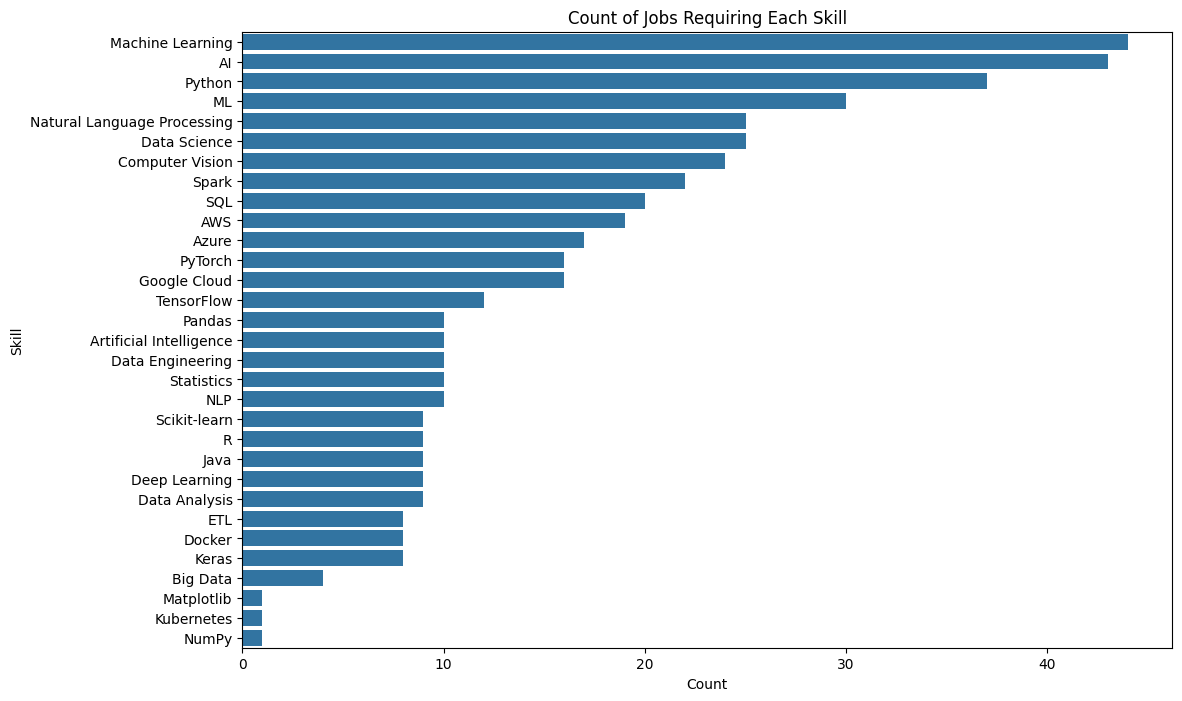

In [86]:
# Example dashboard: Count of jobs requiring each skill
skills_flattened = [skill for sublist in skills_list for skill in sublist]
skills_series = pd.Series(skills_flattened)
skills_count = skills_series.value_counts().reset_index()
skills_count.columns = ['Skill', 'Count']

# Plotting the skill count using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Skill', data=skills_count)
plt.title('Count of Jobs Requiring Each Skill')
plt.xlabel('Count')
plt.ylabel('Skill')
plt.show()
        

Data saved to job_data.xlsx
